## Where Do People Drink The Most Beer, Wine And Spirits?

<img src="https://s1.qwant.com/thumbr/0x0/3/f/a2d61eb9aa851a55e62456389bde7986e358da62a08b5c5ac98aaa851447dc/alcoholconsumption.gif?u=http%3A%2F%2F4.bp.blogspot.com%2F-0u5Sk_omAEE%2FTV3XZtyPQ1I%2FAAAAAAAAArc%2FyVlSiUp6aTU%2Fs1600%2Falcoholconsumption.gif&q=0&b=1&p=0&a=1">

The dataset for this analysis is from this post in [FiveThirtyEight](https://fivethirtyeight.com/features/dear-mona-followup-where-do-people-drink-the-most-beer-wine-and-spirits/)

Data: https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv")
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


## Problem 1
Convert the following data into tidy format with the headers `country`, `drink` and `servings`. Drop the column `total_litres_of_pure_alcohol`

In [ ]:
df.drop('total_litres_of_pure_alcohol', axis=1, inplace=True)

df = df.melt(
       id_vars=['country'],
       var_name='drink',
       value_name= 'servings'
)
df

,country,drink,servings
0,Afghanistan,beer_servings,0
1,Albania,beer_servings,89
2,Algeria,beer_servings,25
3,Andorra,beer_servings,245
4,Angola,beer_servings,217
...,...,...,...
574,Venezuela,wine_servings,3
575,Vietnam,wine_servings,1
576,Yemen,wine_servings,0
577,Zambia,wine_servings,4


## Problem 2
Remove `"_servings"` from the data in the tidy dataframe in Problem 1. Who drinks the most beer, wine and spirits? Create three categorical plots of your choice to illustrate the top 10 countries that drink the most wine, beer or spirits.

In [ ]:
df.drink = df.drink.str.removesuffix('_servings')

In [ ]:
print('Most beer :', df.loc[df[df.drink == 'beer'].servings.idxmax()].country)
print('Most wine :', df.loc[df[df.drink == 'wine'].servings.idxmax()].country)
print('Most spirits :', df.loc[df[df.drink == 'spirit'].servings.idxmax()].country)

Most beer : Namibia
Most wine : France
Most spirits : Grenada


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

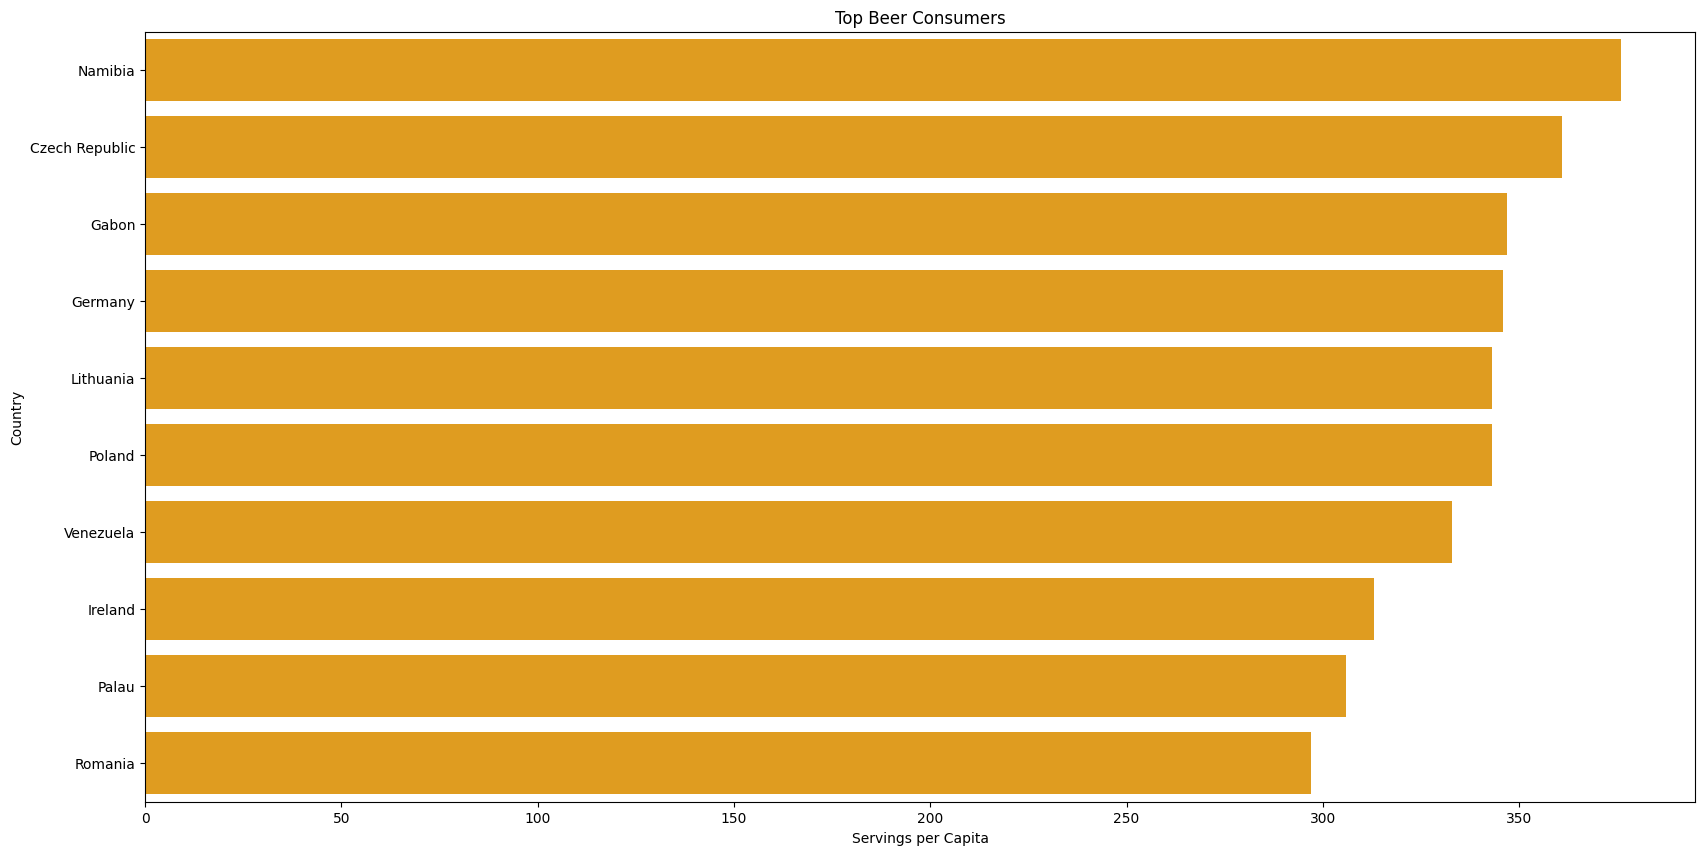

In [ ]:
plt.figure(figsize=(20, 10))

ax = sns.barplot(df[df.drink == 'beer'].sort_values('servings', ascending = False)[0:10],
            x="servings",
            y="country",
            orient="y",
            color = 'orange'
)

ax.set(xlabel='Servings per Capita', ylabel='Country')
plt.title('Top Beer Consumers')
plt.show()

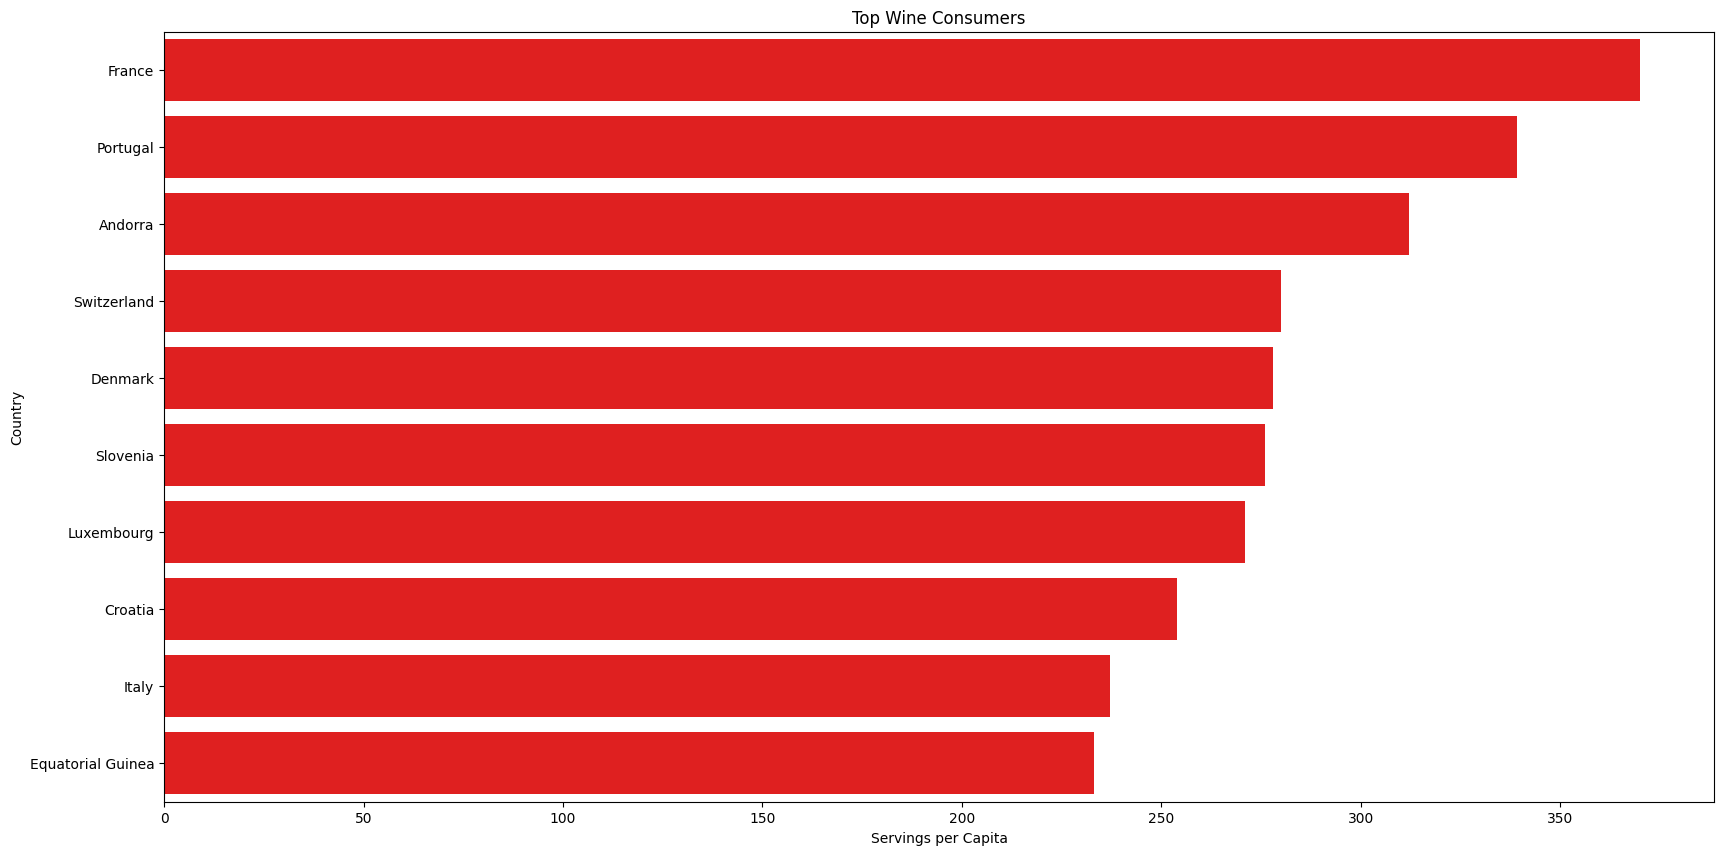

In [ ]:
plt.figure(figsize=(20, 10))

ax = sns.barplot(df[df.drink == 'wine'].sort_values('servings', ascending = False)[0:10],
            x="servings",
            y="country",
            orient="y",
            color = 'red'
)
ax.set(xlabel='Servings per Capita', ylabel='Country')
plt.title('Top Wine Consumers')
plt.show()

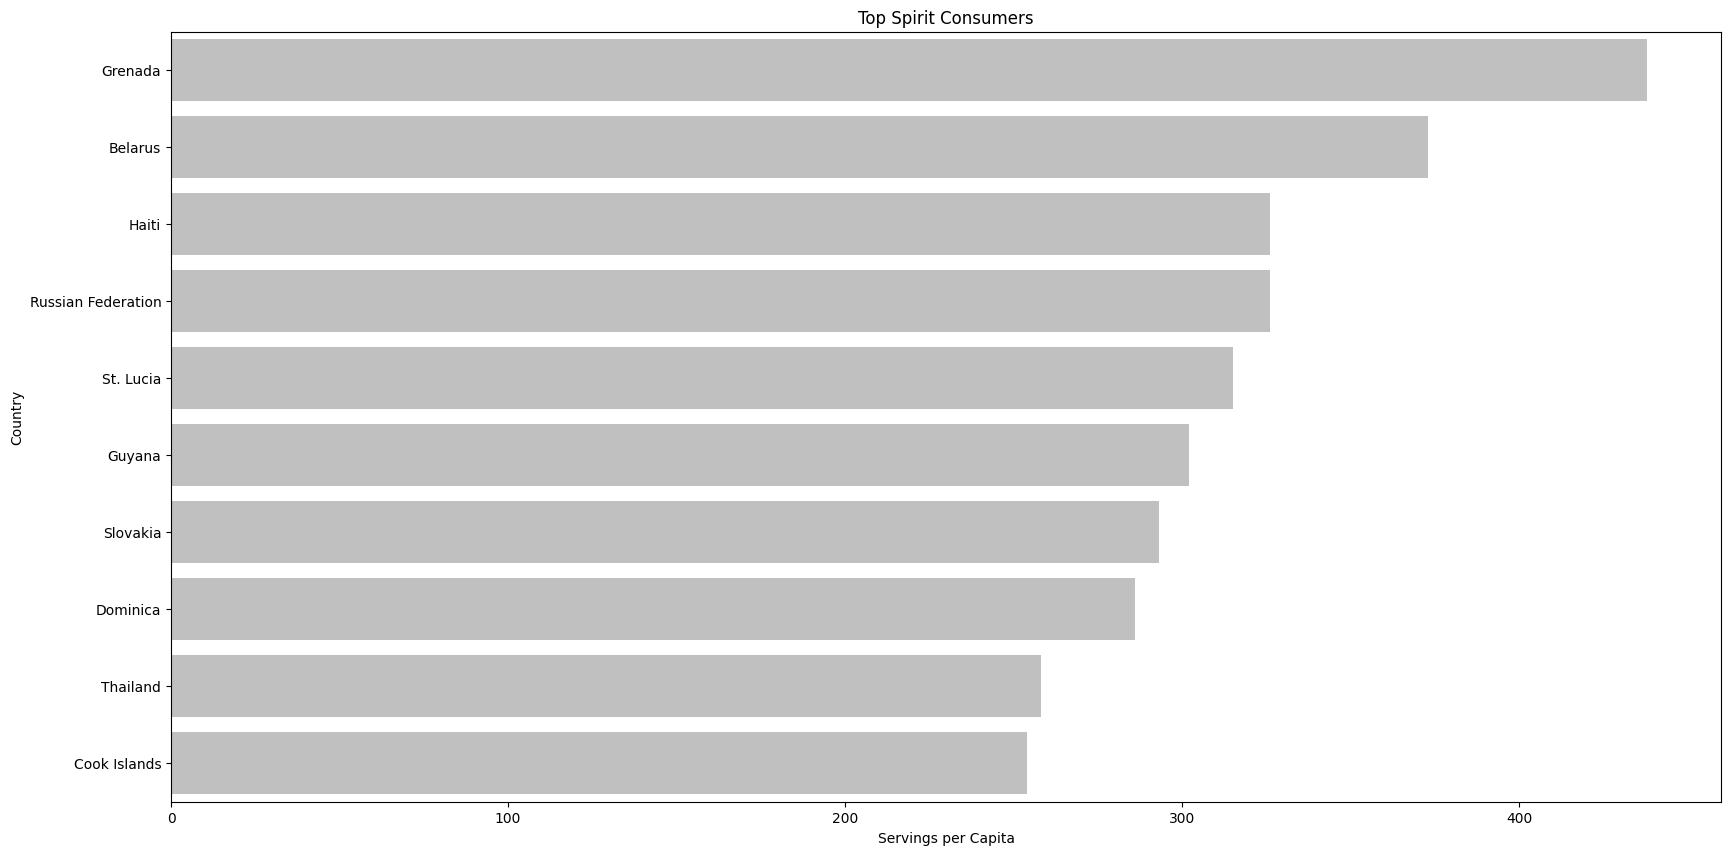

In [ ]:
plt.figure(figsize=(20, 10))

ax = sns.barplot(df[df.drink == 'spirit'].sort_values('servings', ascending = False)[0:10],
            x="servings",
            y="country",
            orient="y",
            color = 'silver'
)

ax.set(xlabel='Servings per Capita', ylabel='Country')
plt.title('Top Spirit Consumers')
plt.show()

## Problem 3
Create a wide dataframe using `pivot_table` with the tidy dataframe from Problem 2

In [ ]:
pd.pivot_table(df,
               index = 'country',
               columns = 'drink',
               values = 'servings')

drink,beer,spirit,wine
country,,,
Afghanistan,0,0,0
Albania,89,132,54
Algeria,25,0,14
Andorra,245,138,312
Angola,217,57,45
...,...,...,...
Venezuela,333,100,3
Vietnam,111,2,1
Yemen,6,0,0
